# Text Analyize

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. 고빈도 단어 및 이그램 분석

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the processed dataframes from Google Drive
gemini_df_4 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/최종리포트/gemini_processed_4.csv")
gpt_df_4 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/최종리포트/gpt_processed_4.csv")
gemini_df_1 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/최종리포트/gemini_processed_1.csv")
gpt_df_1 = pd.read_csv("/content/drive/MyDrive/AI_media_Text/최종리포트/gpt_processed_1.csv")

In [3]:
# 이미 process_df()로 전처리 완료된 데이터프레임 사용
# 텍스트 컬럼: lemmatized 우선, 없으면 clean_text
def pick_text_col(df):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("텍스트 컬럼 없음")

text_col = pick_text_col(gemini_df_4)

# 텍스트 추출
gpt_texts_4    = gpt_df_4[text_col].dropna().astype(str).tolist()
gemini_texts_4 = gemini_df_4[text_col].dropna().astype(str).tolist()
gpt_texts_1    = gpt_df_1[text_col].dropna().astype(str).tolist()
gemini_texts_1 = gemini_df_1[text_col].dropna().astype(str).tolist()


In [4]:
# --------------------------------
# 3.1.1 유니그램 고빈도 단어
# --------------------------------
vectorizer_uni = CountVectorizer(ngram_range=(1,1), min_df=3)

def top_n_words(texts, vectorizer, n=20):
    X = vectorizer.fit_transform(texts)
    freqs = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    freq_df = pd.DataFrame({"token": vocab, "freq": freqs})
    return freq_df.sort_values(by="freq", ascending=False).head(n)

print("=== GPT_4 고빈도 단어 ===")
print(top_n_words(gpt_texts_4, vectorizer_uni, 20))

print("\n=== Gemini_4 고빈도 단어 ===")
print(top_n_words(gemini_texts_4, vectorizer_uni, 20))

print("\n=== GPT_1 고빈도 단어 ===")
print(top_n_words(gpt_texts_1, vectorizer_uni, 20))

print("\n=== Gemini_1 고빈도 단어 ===")
print(top_n_words(gemini_texts_1, vectorizer_uni, 20))

=== GPT_4 고빈도 단어 ===
          token  freq
190         app  7060
1483       good  4552
1950       like  2881
534     chatgpt  2228
530        chat  2194
3443       time  2122
102          ai  2023
1668      image  1805
2708     really  1805
1506      great  1804
3625        use  1801
1464       give  1627
1586       help  1566
171      answer  1534
2045       make  1524
1589    helpful  1508
3159  sometimes  1392
3415      thing  1351
3777       work  1341
2589    problem  1319

=== Gemini_4 고빈도 단어 ===
          token  freq
1043       good  6754
131         app  3064
1001     gemini  2628
1627       nice  1932
72           ai  1670
1399       like  1604
1045     google  1508
1060      great  1304
172   assistant  1063
1614       need  1029
258      better  1022
2597        use  1019
254        best  1010
2702       work   886
1118    helpful   850
115      answer   825
1948     really   733
2465       time   708
2641      voice   703
2314      still   701

=== GPT_1 고빈도 단어 ===
        

In [5]:
# --------------------------------
# 3.1.2 이그램(Bigram) 고빈도
# --------------------------------
vectorizer_bi = CountVectorizer(ngram_range=(2,2), min_df=3)

def top_n_bigrams(texts, vectorizer, n=20):
    X = vectorizer.fit_transform(texts)
    freqs = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    freq_df = pd.DataFrame({"bigram": vocab, "freq": freqs})
    return freq_df.sort_values(by="freq", ascending=False).head(n)

# 4점 리뷰
gpt_top_bi_4    = top_n_bigrams(gpt_texts_4, vectorizer_bi, 20)
gemini_top_bi_4 = top_n_bigrams(gemini_texts_4, vectorizer_bi, 20)

print("\n=== GPT_4 이그램 ===")
print(gpt_top_bi_4)

print("\n=== Gemini_4 이그램 ===")
print(gemini_top_bi_4)

# 1점 리뷰
gpt_top_bi_1 = top_n_bigrams(gpt_texts_1, vectorizer_bi, 20)
gemini_top_bi_1 = top_n_bigrams(gemini_texts_1, vectorizer_bi, 20)

print("\n=== GPT_1 이그램 ===")
print(gpt_top_bi_1)

print("\n=== Gemini_1 이그램 ===")
print(gemini_top_bi_1)


=== GPT_4 이그램 ===
               bigram  freq
3615         good app   787
1644         chat gpt   674
3959        great app   499
7459      really good   327
5629         love app   290
6322         nice app   276
835          app good   263
1317          best ai   259
1323         best app   242
2457         easy use   234
844          app help   204
6910       please fix   203
952        app really   184
7468   really helpful   180
3528        give star   172
4151         help lot   169
455       amazing app   168
170            ai app   163
621   answer question   161
3608          good ai   160

=== Gemini_4 이그램 ===
                bigram  freq
1602          good app   498
1794  google assistant   488
2733          nice app   232
1596           good ai   223
796           chat gpt   192
1868         great app   182
633            best ai   176
1122          far good   173
1003          easy use   170
3147       really good   169
635           best app   158
3011       pretty good 

In [6]:
# -------------------------------
# 공통/차별 이그램 비교 함수
# -------------------------------
def compare_bigrams(gpt_df, gemini_df, label=""):
    set_gpt    = set(gpt_df["bigram"])
    set_gemini = set(gemini_df["bigram"])

    common   = set_gpt & set_gemini
    gpt_only = set_gpt - set_gemini
    gem_only = set_gemini - set_gpt

    print(f"\n=== 공통 이그램 (GPT vs Gemini {label}) ===")
    print(common if common else "없음")
    print(f"\n=== GPT 전용 이그램 ({label}) ===")
    print(gpt_only if gpt_only else "없음")
    print(f"\n=== Gemini 전용 이그램 ({label}) ===")
    print(gem_only if gem_only else "없음")

# -------------------------------
# 별점 4점 비교
# -------------------------------
compare_bigrams(gpt_top_bi_4, gemini_top_bi_4, label="⭐4점 리뷰")

# -------------------------------
# 별점 1점 비교
# -------------------------------
compare_bigrams(gpt_top_bi_1, gemini_top_bi_1, label="⭐1점 리뷰")



=== 공통 이그램 (GPT vs Gemini ⭐4점 리뷰) ===
{'app good', 'best app', 'chat gpt', 'good ai', 'ai app', 'good app', 'best ai', 'really good', 'easy use', 'nice app', 'great app'}

=== GPT 전용 이그램 (⭐4점 리뷰) ===
{'help lot', 'love app', 'answer question', 'app help', 'app really', 'please fix', 'really helpful', 'amazing app', 'give star'}

=== Gemini 전용 이그램 (⭐4점 리뷰) ===
{'hey google', 'gemini live', 'gemini good', 'google assistant', 'far good', 'pretty good', 'google gemini', 'gemini app', 'need improvement'}

=== 공통 이그램 (GPT vs Gemini ⭐1점 리뷰) ===
{'chat gpt', 'generate image', 'every time'}

=== GPT 전용 이그램 (⭐1점 리뷰) ===
{'use app', 'went wrong', 'bring back', 'worst app', 'feel like', 'new update', 'free version', 'please fix', 'wrong answer', 'something went', 'try later', 'much time', 'give wrong', 'even though', 'waste time', 'many time', 'create image'}

=== Gemini 전용 이그램 (⭐1점 리뷰) ===
{'worst ai', 'hey google', 'assistant gemini', 'set alarm', 'google assistant', 'turn phone', 'like google'

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


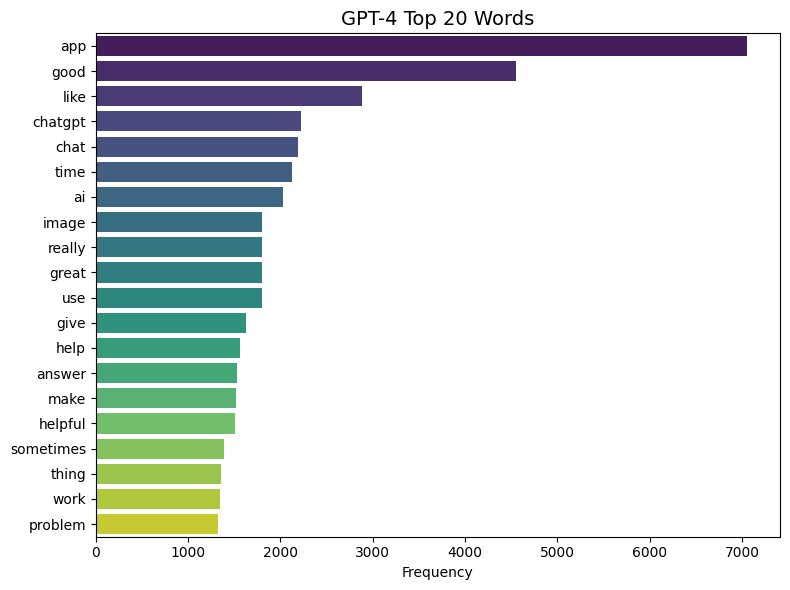

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


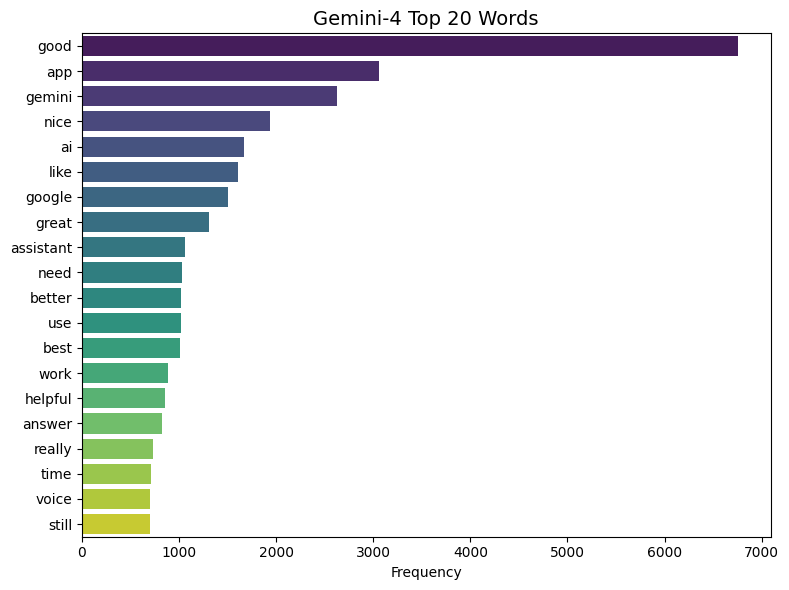

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


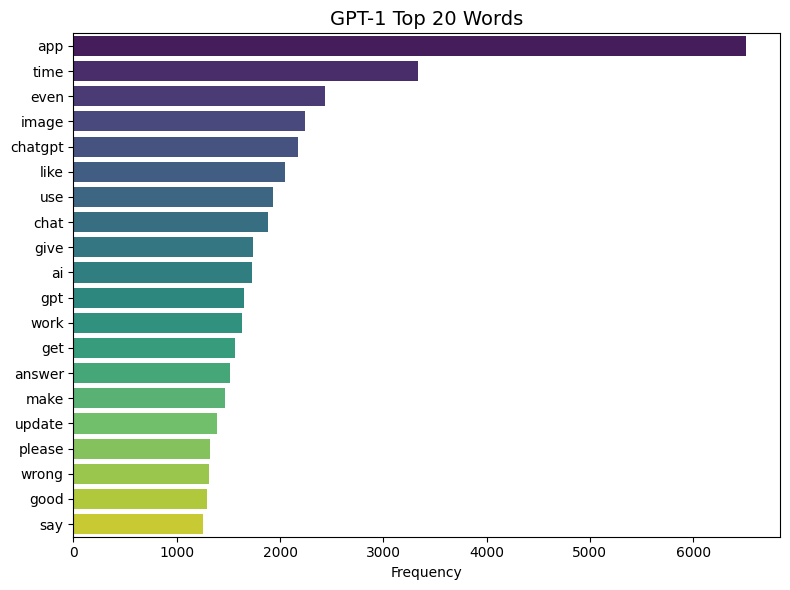

/tmp/ipython-input-3780935352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


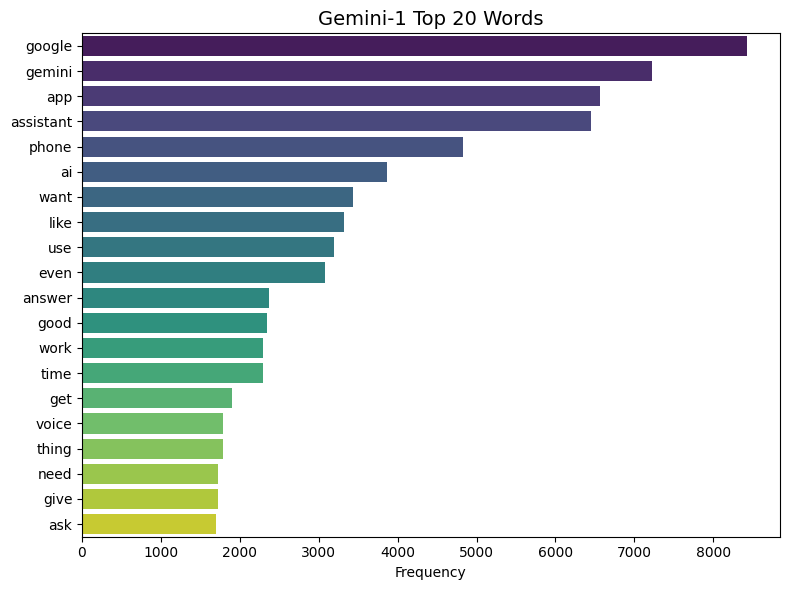

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


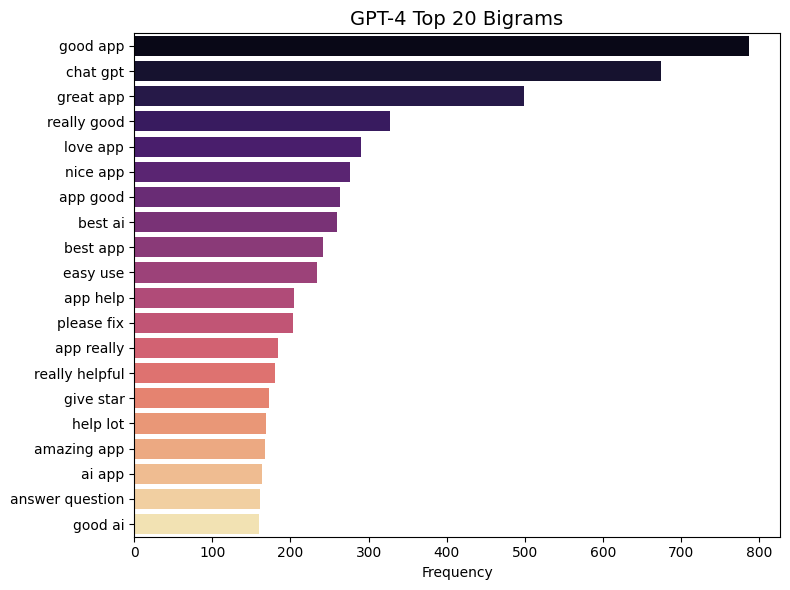

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


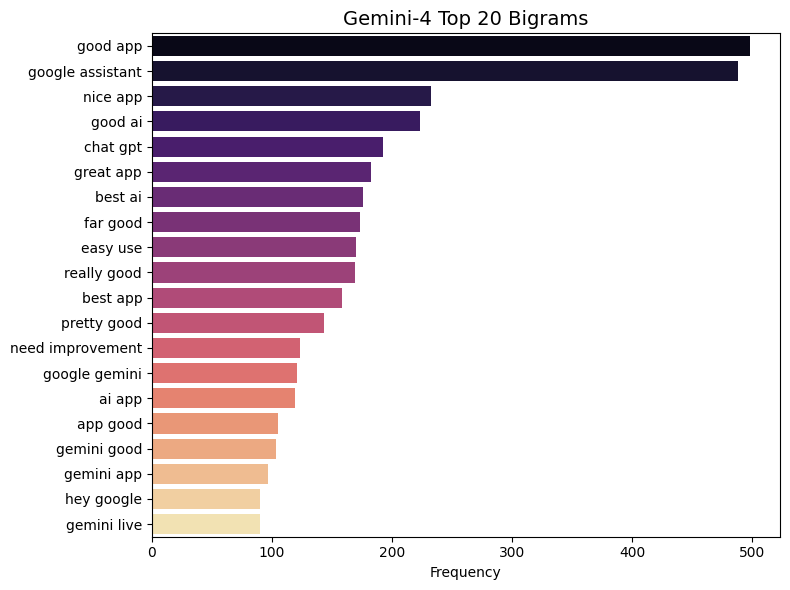

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


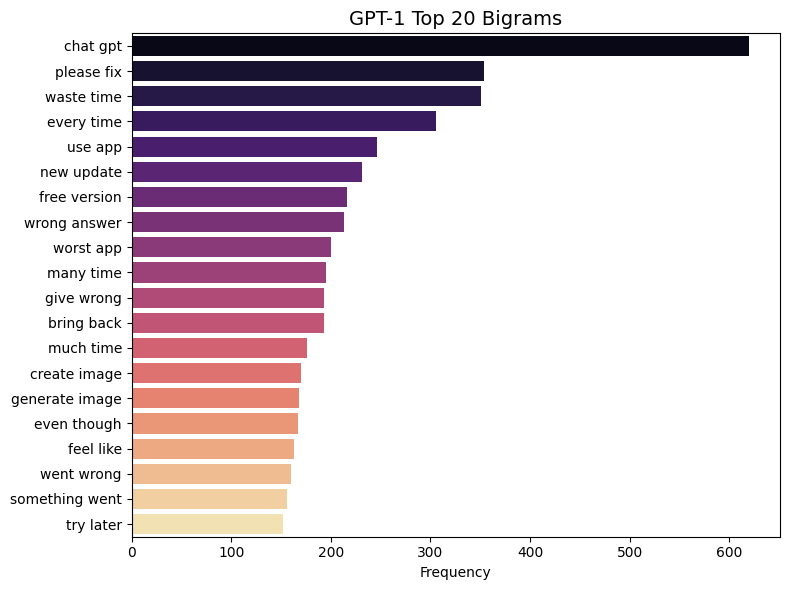

/tmp/ipython-input-3780935352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


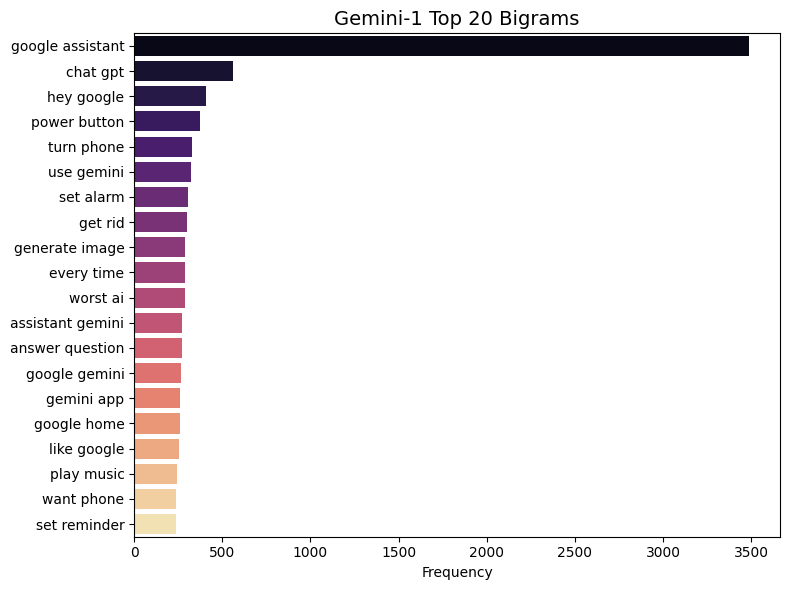

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 유니그램 시각화 함수
# --------------------------
def plot_top_words(df, title, colname="token"):
    plt.figure(figsize=(8,6))
    sns.barplot(
        data=df.sort_values("freq", ascending=False),
        y=colname, x="freq", palette="viridis"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# --------------------------
# 이그램 시각화 함수
# --------------------------
def plot_top_bigrams(df, title):
    plt.figure(figsize=(8,6))
    sns.barplot(
        data=df.sort_values("freq", ascending=False),
        y="bigram", x="freq", palette="magma"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# --------------------------
# 유니그램 시각화
# --------------------------
plot_top_words(top_n_words(gpt_texts_4, vectorizer_uni, 20), "GPT-4 Top 20 Words")
plot_top_words(top_n_words(gemini_texts_4, vectorizer_uni, 20), "Gemini-4 Top 20 Words")

plot_top_words(top_n_words(gpt_texts_1, vectorizer_uni, 20), "GPT-1 Top 20 Words")
plot_top_words(top_n_words(gemini_texts_1, vectorizer_uni, 20), "Gemini-1 Top 20 Words")

# --------------------------
# 이그램 시각화
# --------------------------
plot_top_bigrams(top_n_bigrams(gpt_texts_4, vectorizer_bi, 20), "GPT-4 Top 20 Bigrams")
plot_top_bigrams(top_n_bigrams(gemini_texts_4, vectorizer_bi, 20), "Gemini-4 Top 20 Bigrams")
plot_top_bigrams(top_n_bigrams(gpt_texts_1, vectorizer_bi, 20), "GPT-1 Top 20 Bigrams")
plot_top_bigrams(top_n_bigrams(gemini_texts_1, vectorizer_bi, 20), "Gemini-1 Top 20 Bigrams")

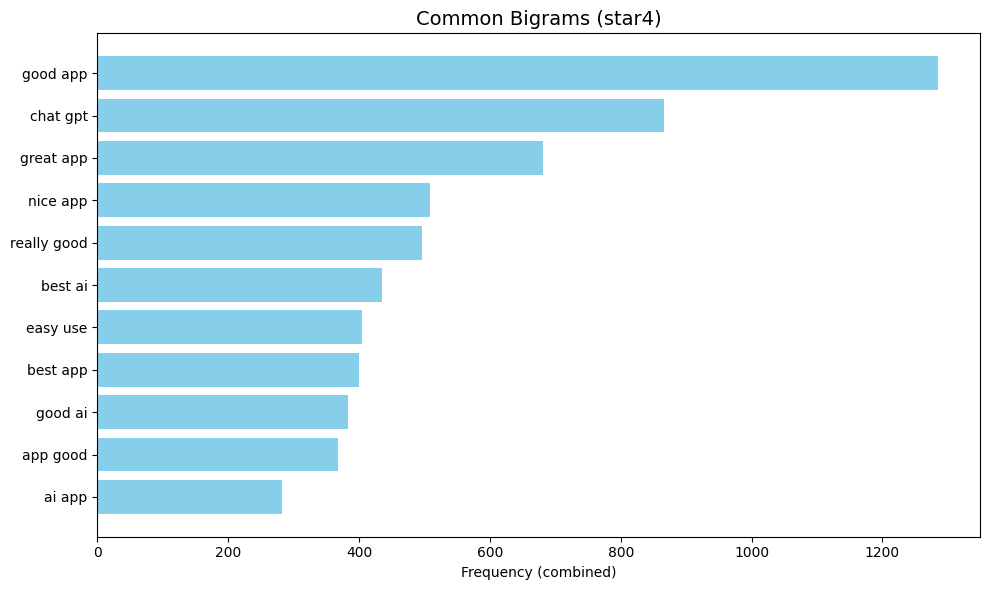

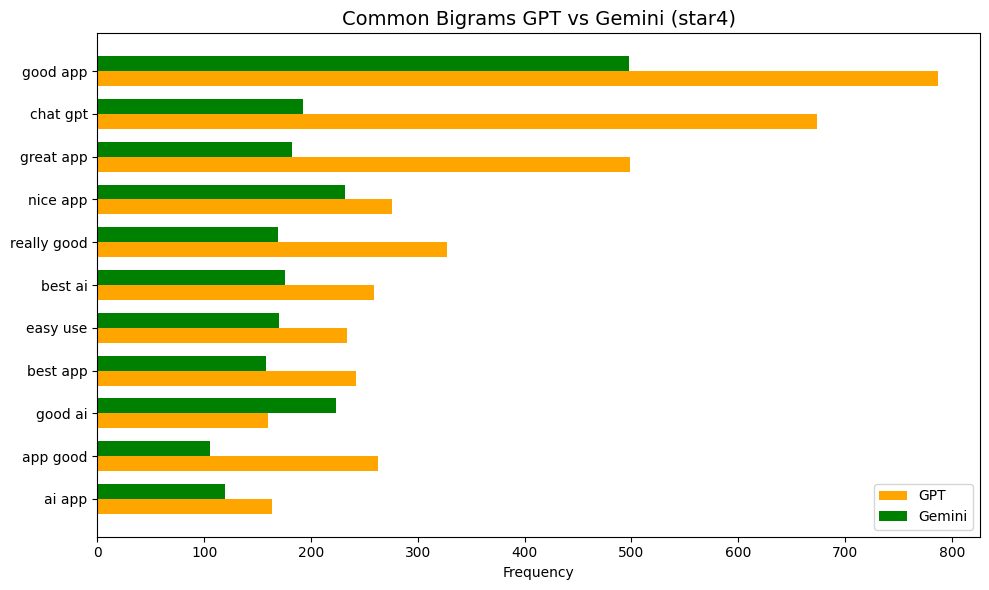

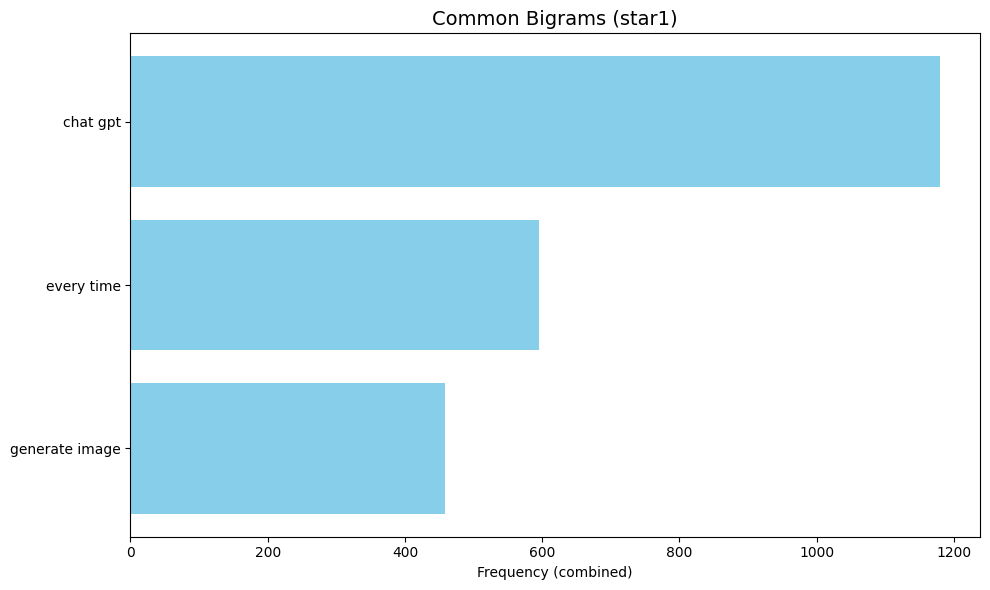

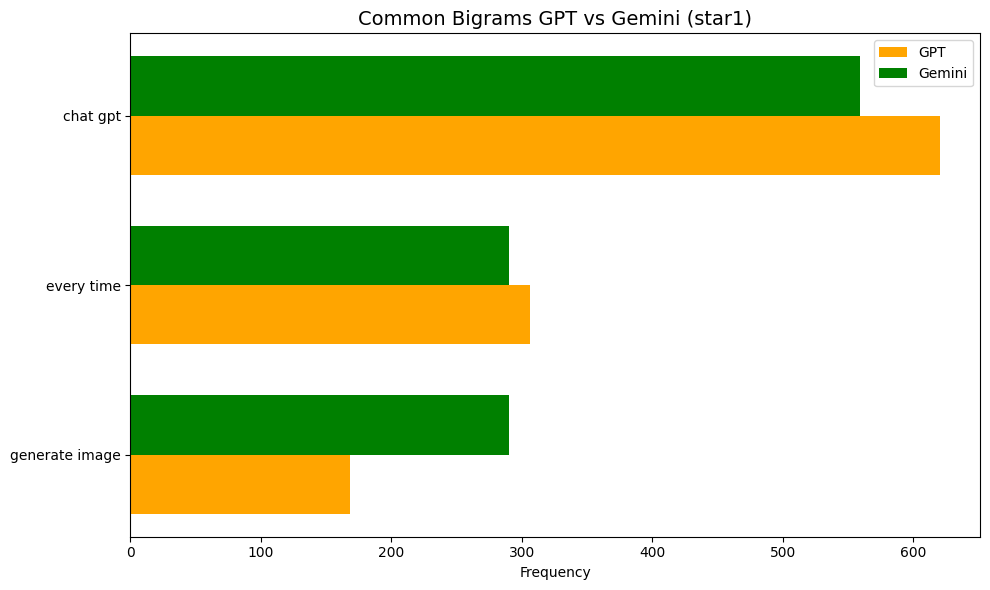

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ------------------------------
# 공통 이그램 테이블 만들기
# ------------------------------
def make_common_bigrams(gpt_df, gem_df, top_n=20):
    gpt = gpt_df[['bigram','freq']].copy().rename(columns={'freq':'freq_gpt'})
    gem = gem_df[['bigram','freq']].copy().rename(columns={'freq':'freq_gem'})

    # 공통 bigram만 merge
    common_df = pd.merge(gpt, gem, on='bigram', how='inner')
    common_df['freq_comb'] = common_df['freq_gpt'] + common_df['freq_gem']

    # combined 기준 정렬
    common_df = common_df.sort_values('freq_comb', ascending=False).head(top_n)
    return common_df

# ------------------------------
# 공통 이그램 시각화
# ------------------------------
def plot_common_bigrams(common_df, tag="star4", outdir="/content/drive/MyDrive/AI_media_Text/최종리포트"):
    if common_df.empty:
        print(f"[경고] {tag}: 공통 bigram 없음")
        return

    # 저장 폴더
    Path(outdir).mkdir(parents=True, exist_ok=True)

    # 막대그래프 (합계 기준)
    d = common_df.sort_values("freq_comb", ascending=True)
    plt.figure(figsize=(10,6))
    plt.barh(d["bigram"], d["freq_comb"], color="skyblue", label="GPT+Gemini 합계")
    plt.title(f"Common Bigrams ({tag})", fontsize=14)
    plt.xlabel("Frequency (combined)")
    plt.tight_layout()
    plt.savefig(f"{outdir}/bigrams_common_{tag}.png", dpi=200)
    plt.show()

    # (선택) GPT vs Gemini 개별 빈도 비교 막대그래프
    d = common_df.sort_values("freq_comb", ascending=True)
    bar_w = 0.35
    x = range(len(d))
    plt.figure(figsize=(10,6))
    plt.barh([i-bar_w/2 for i in x], d["freq_gpt"], bar_w, label="GPT", color="orange")
    plt.barh([i+bar_w/2 for i in x], d["freq_gem"], bar_w, label="Gemini", color="green")
    plt.yticks(x, d["bigram"])
    plt.title(f"Common Bigrams GPT vs Gemini ({tag})", fontsize=14)
    plt.xlabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{outdir}/bigrams_common_compare_{tag}.png", dpi=200)
    plt.show()

    # CSV 저장
    # common_df.to_csv(f"{outdir}/bigrams_common_{tag}.csv", index=False)
    # print(f"💾 저장 완료: {outdir}/bigrams_common_{tag}.(png/csv)")

# ------------------------------
# 실행 예시
# ------------------------------
# 별점 4점 리뷰 공통 bigram
common_bi_4 = make_common_bigrams(gpt_top_bi_4, gemini_top_bi_4, top_n=20)
plot_common_bigrams(common_bi_4, tag="star4")

# 별점 1점 리뷰 공통 bigram
common_bi_1 = make_common_bigrams(gpt_top_bi_1, gemini_top_bi_1, top_n=20)
plot_common_bigrams(common_bi_1, tag="star1")



## 2. 동시 출현어 분석 (네트워크)


In [9]:
# 네트워크 분석을 위한 기본 설정

import pandas as pd
import numpy as np
import re
import itertools
from collections import Counter
import networkx as nx

# 텍스트 컬럼 선택 (lemmatized > clean_text > stemmed)
def pick_text_col(df: pd.DataFrame):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("텍스트 컬럼(lemmatized/clean_text/stemmed)이 없습니다.")

# 안전 토큰화 (전처리 가정, 잔여 특문 제거)
def to_tokens(text: str):
    if pd.isna(text): return []
    text = re.sub(r"[^a-z\s]", " ", str(text).lower())
    toks = [t for t in text.split() if t]
    return toks

# 문서 기준 윈도우 co-occur 쌍 추출
def cooccurrence_pairs(tokens, window_size=3):
    pairs = []
    L = len(tokens)
    for i in range(L):
        right = tokens[i+1:i+window_size]
        for w in right:
            if tokens[i] == w:
                continue
            a, b = sorted((tokens[i], w))
            pairs.append((a, b))
    return pairs

# 코퍼스 네트워크 구축 + 기본 구조 지표 계산
def build_cooc_network(
    texts,
    window_size=3,
    min_pair_count=5,  # 간선 최소 빈도
    min_node_freq=5,   # 노드 최소 등장 빈도
    top_edges=None     # 상위 간선 수 제한 (시각화/경량화용)
):
    # 토큰화
    tokenized = [to_tokens(t) for t in texts if isinstance(t, str) and len(t.strip()) > 0]
    # 노드 빈도
    node_freq = Counter(itertools.chain.from_iterable(tokenized))
    # 간선 빈도
    pair_counter = Counter()
    for toks in tokenized:
        if len(toks) >= 2:
            pair_counter.update(cooccurrence_pairs(toks, window_size=window_size))
    # 간선/노드 필터링
    pairs = [(a,b,cnt) for (a,b),cnt in pair_counter.items()
             if cnt >= min_pair_count and node_freq[a] >= min_node_freq and node_freq[b] >= min_node_freq]
    if top_edges is not None and len(pairs) > top_edges:
        pairs = sorted(pairs, key=lambda x: x[2], reverse=True)[:top_edges]

    # 그래프 구축
    G = nx.Graph()
    for w, f in node_freq.items():
        if f >= min_node_freq:
            G.add_node(w, freq=int(f))
    for a, b, w in pairs:
        if a in G and b in G:
            G.add_edge(a, b, weight=int(w))

    # 노드 지표
    deg = dict(G.degree())
    strength = {n: sum(d['weight'] for _,_,d in G.edges(n, data=True)) for n in G.nodes()}
    clustering = nx.clustering(G, weight='weight') if len(G) else {}
    # 중심성 (데이터 크면 계산 시간 ↑ → 필요 시 생략/샘플)
    try:
        btw = nx.betweenness_centrality(G, weight='weight', normalized=True)
    except Exception:
        btw = {n: np.nan for n in G.nodes()}
    try:
        eig = nx.eigenvector_centrality_numpy(G, weight='weight')
    except Exception:
        eig = {n: np.nan for n in G.nodes()}

    node_df = pd.DataFrame({
        "node": list(G.nodes()),
        "freq": [G.nodes[n].get("freq", 0) for n in G.nodes()],
        "degree": [deg.get(n,0) for n in G.nodes()],
        "strength": [strength.get(n,0) for n in G.nodes()],
        "clustering": [clustering.get(n,0.0) for n in G.nodes()],
        "betweenness": [btw.get(n, np.nan) for n in G.nodes()],
        "eigenvector": [eig.get(n, np.nan) for n in G.nodes()],
    }).sort_values(["strength","degree","freq"], ascending=False)

    edge_df = pd.DataFrame(
        [(u,v,d["weight"]) for u,v,d in G.edges(data=True)],
        columns=["u","v","weight"]
    ).sort_values("weight", ascending=False)

    # 그래프 전체 요약
    summary = {
        "n_nodes": G.number_of_nodes(),
        "n_edges": G.number_of_edges(),
        "density": nx.density(G) if G.number_of_nodes() > 1 else 0.0,
        "avg_degree": (2*G.number_of_edges()/G.number_of_nodes()) if G.number_of_nodes() > 0 else 0.0,
        "avg_clustering": nx.average_clustering(G, weight='weight') if G.number_of_nodes() > 0 else 0.0
    }
    return G, node_df, edge_df, summary


### GPT 리뷰

In [10]:
# 4점 리뷰
# === 데이터 선택 (예: 별점 4 리뷰) ===
text_col = pick_text_col(gpt_df_4)
gpt_texts = gpt_df_4[text_col].dropna().astype(str).tolist()

# === 네트워크 구축 & 구조 지표 ===
G_gpt, gpt_nodes, gpt_edges, gpt_sum = build_cooc_network(
    gpt_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("ChatGPT 네트워크 요약:", gpt_sum)
display(gpt_nodes.head(15))  # 핵심 노드 TOP15
display(gpt_edges.head(15))  # 강한 간선 TOP15


ChatGPT 네트워크 요약: {'n_nodes': 2861, 'n_edges': 300, 'density': 7.332758119196428e-05, 'avg_degree': 0.20971688220901782, 'avg_clustering': 0.0014571105109997106}


,node,freq,degree,strength,clustering,betweenness,eigenvector
72,app,7060,65,11290,0.010148,0.000727,NaN
221,good,4552,39,5489,0.018971,0.000287,NaN
33,like,2881,26,2669,0.019912,0.000325,NaN
49,time,2122,20,2236,0.019571,0.000143,NaN
16,really,1805,13,1950,0.058141,0.000046,NaN
90,give,1627,14,1861,0.031962,0.000069,NaN
45,ai,2023,14,1732,0.039681,0.000044,NaN
84,chat,2194,12,1606,0.024306,0.000065,NaN
79,image,1805,15,1596,0.014034,0.000196,NaN
269,help,1566,15,1571,0.029984,0.000083,NaN


,u,v,weight
121,app,good,1316
122,app,great,727
71,gpt,chat,703
18,really,app,461
94,time,take,426
123,app,best,419
124,app,love,416
125,app,nice,400
19,really,good,394
126,app,helpful,393


In [11]:
# 1점 리뷰
# === 데이터 선택 (예: 별점 4 리뷰) ===
text_col = pick_text_col(gpt_df_1)
gpt_texts = gpt_df_1[text_col].dropna().astype(str).tolist()

# === 네트워크 구축 & 구조 지표 ===
G_gpt, gpt_nodes, gpt_edges, gpt_sum = build_cooc_network(
    gpt_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("ChatGPT 네트워크 요약:", gpt_sum)
display(gpt_nodes.head(15))  # 핵심 노드 TOP15
display(gpt_edges.head(15))  # 강한 간선 TOP15


ChatGPT 네트워크 요약: {'n_nodes': 3356, 'n_edges': 300, 'density': 5.3288902230851074e-05, 'avg_degree': 0.17878426698450536, 'avg_clustering': 0.002069664989823306}


,node,freq,degree,strength,clustering,betweenness,eigenvector
65,app,6516,68,7807,0.006360,0.001391,NaN
154,time,3337,32,3944,0.015771,0.000515,NaN
45,image,2246,21,2101,0.010990,0.000332,NaN
113,wrong,1310,11,1640,0.049547,0.000133,NaN
145,give,1737,11,1472,0.057477,0.000095,NaN
591,answer,1513,9,1369,0.058475,0.000034,NaN
49,even,2439,14,1298,0.043872,0.000159,NaN
58,please,1323,10,1216,0.040688,0.000091,NaN
129,use,1929,11,1183,0.052868,0.000066,NaN
51,gpt,1656,8,1183,0.040676,0.000138,NaN


,u,v,weight
79,gpt,chat,646
233,time,waste,443
98,please,fix,408
112,app,use,403
234,time,every,355
227,give,answer,318
201,wrong,answer,314
113,app,good,278
114,app,time,272
115,app,worst,263


### Gemini 분석

In [12]:
# 구조 분석 4점
# === 데이터 선택 (예: 별점 4 리뷰) ===
gem_df = gemini_df_4.copy()  # 별점 1로 바꾸려면 gemini_df_1.copy()
text_col = pick_text_col(gem_df)
gem_texts = gem_df[text_col].dropna().astype(str).tolist()

# === 네트워크 구축 & 구조 지표 ===
G_gem, gem_nodes, gem_edges, gem_sum = build_cooc_network(
    gem_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("Gemini 네트워크 요약:", gem_sum)
display(gem_nodes.head(15))
display(gem_edges.head(15))

Gemini 네트워크 요약: {'n_nodes': 1953, 'n_edges': 300, 'density': 0.00015738712195613306, 'avg_degree': 0.30721966205837176, 'avg_clustering': 0.00197880114844538}


,node,freq,degree,strength,clustering,betweenness,eigenvector
96,good,6754,48,4210,0.017103,0.000936,NaN
49,app,3064,40,3750,0.021304,0.000638,NaN
20,gemini,2628,49,3115,0.014987,0.001023,NaN
3,ai,1670,24,1896,0.039288,0.000157,NaN
98,google,1508,21,1858,0.042897,0.000123,NaN
12,like,1604,23,1598,0.033531,0.000223,NaN
99,assistant,1063,13,1328,0.081696,0.000095,NaN
53,better,1022,20,1115,0.025430,0.000226,NaN
246,great,1304,16,920,0.039251,0.000254,NaN
186,use,1019,14,888,0.045791,0.000117,NaN


,u,v,weight
144,app,good,718
242,google,assistant,522
0,ai,good,312
145,app,nice,281
213,good,far,255
146,app,great,248
62,gemini,google,235
147,app,best,232
63,gemini,good,227
1,ai,best,210


In [13]:
# 구조 분석

# === 데이터 선택 (예: 별점 4 리뷰) ===
text_col = pick_text_col(gemini_df_1)
gem_texts = gemini_df_1[text_col].dropna().astype(str).tolist()

# === 네트워크 구축 & 구조 지표 ===
G_gem, gem_nodes, gem_edges, gem_sum = build_cooc_network(
    gem_texts,
    window_size=3,
    min_pair_count=5,
    min_node_freq=5,
    top_edges=300
)
print("Gemini 네트워크 요약:", gem_sum)
display(gem_nodes.head(15))
display(gem_edges.head(15))

Gemini 네트워크 요약: {'n_nodes': 3952, 'n_edges': 300, 'density': 3.842618637007799e-05, 'avg_degree': 0.15182186234817813, 'avg_clustering': 0.0007052722120012656}


,node,freq,degree,strength,clustering,betweenness,eigenvector
37,google,8425,46,13061,0.009020,0.000405,NaN
10,assistant,6454,41,11438,0.009970,0.000258,NaN
11,gemini,7221,38,7521,0.009973,0.000244,NaN
31,app,6560,35,6473,0.009164,0.000230,NaN
16,phone,4823,30,5518,0.009553,0.000198,NaN
62,want,3432,15,3195,0.029551,0.000042,NaN
44,use,3199,12,2939,0.048445,0.000020,NaN
249,ai,3866,16,2766,0.024369,0.000048,NaN
28,like,3315,17,2690,0.017991,0.000088,NaN
3,even,3081,14,2156,0.016887,0.000051,NaN


,u,v,weight
18,assistant,google,3760
58,gemini,google,859
19,assistant,gemini,744
102,phone,want,593
299,chat,gpt,574
151,app,google,551
294,answer,question,527
59,gemini,app,481
60,gemini,use,475
20,assistant,use,462


### 비교 분석


--- 1점 리뷰 네트워크 비교 ---
=== 네트워크 구조 비교 (⭐1점 리뷰) ===


,n_nodes,n_edges,density,avg_degree,avg_clustering
ChatGPT,3356,300,0.000053,0.178784,0.002070
Gemini,3952,300,0.000038,0.151822,0.000705



핵심 노드 상위 50 기준:
- 공통: 24
- GPT 전용 예시: ['new', 'please', 'information', 'one', 'take', 'photo', 'version', 'something', 'free', 'star', 'error', 'update', 'create', 'every', 'waste']
- Gemini 전용 예시: ['power', 'replace', 'home', 'google', 'open', 'without', 'set', 'old', 'gemini', 'hey', 'feature', 'thing', 'language', 'change', 'basic']
핵심노드 Jaccard 유사도: 0.316
커뮤니티 개수 비교 - GPT:3185, Gemini:3806


,u,v,weight_gpt
79,gpt,chat,646
233,time,waste,443
98,please,fix,408
112,app,use,403
234,time,every,355
227,give,answer,318
201,wrong,answer,314
113,app,good,278
114,app,time,272
115,app,worst,263


,u,v,weight_gem
18,assistant,google,3760
58,gemini,google,859
19,assistant,gemini,744
102,phone,want,593
299,chat,gpt,574
151,app,google,551
294,answer,question,527
59,gemini,app,481
60,gemini,use,475
20,assistant,use,462


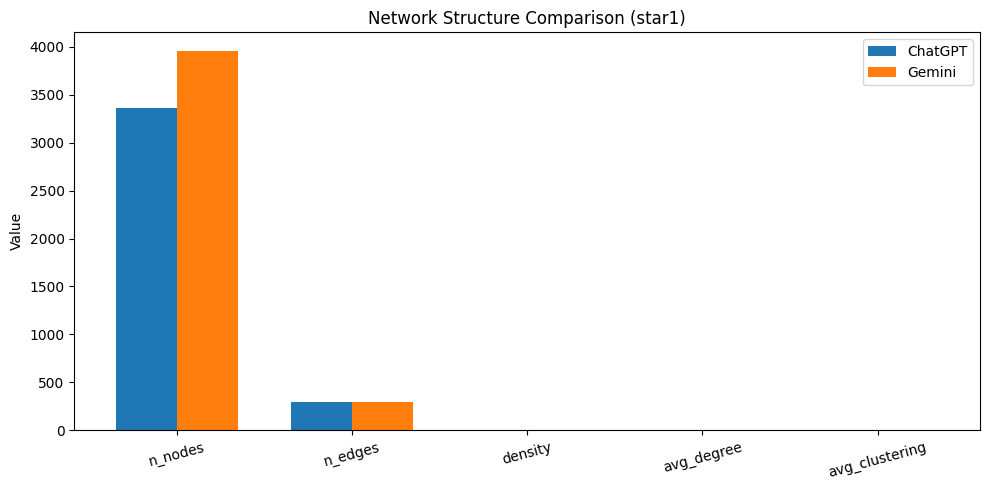

PNG 저장: /content/drive/MyDrive/AI_media_Text/최종리포트/cooc_network_compare_bars_star1.png

--- 4점 리뷰 네트워크 비교 ---
=== 네트워크 구조 비교 (⭐4점 리뷰) ===


,n_nodes,n_edges,density,avg_degree,avg_clustering
ChatGPT,2861,300,0.000073,0.209717,0.001457
Gemini,1953,300,0.000157,0.307220,0.001979



핵심 노드 상위 50 기준:
- 공통: 24
- GPT 전용 예시: ['new', 'please', 'information', 'one', 'take', 'photo', 'version', 'something', 'free', 'star', 'error', 'update', 'create', 'every', 'waste']
- Gemini 전용 예시: ['power', 'replace', 'home', 'google', 'open', 'without', 'set', 'old', 'gemini', 'hey', 'feature', 'thing', 'language', 'change', 'basic']
핵심노드 Jaccard 유사도: 0.316
커뮤니티 개수 비교 - GPT:2734, Gemini:1836


,u,v,weight_gpt
121,app,good,1316
122,app,great,727
71,gpt,chat,703
18,really,app,461
94,time,take,426
123,app,best,419
124,app,love,416
125,app,nice,400
19,really,good,394
126,app,helpful,393


,u,v,weight_gem
144,app,good,718
242,google,assistant,522
0,ai,good,312
145,app,nice,281
213,good,far,255
146,app,great,248
62,gemini,google,235
147,app,best,232
63,gemini,good,227
1,ai,best,210


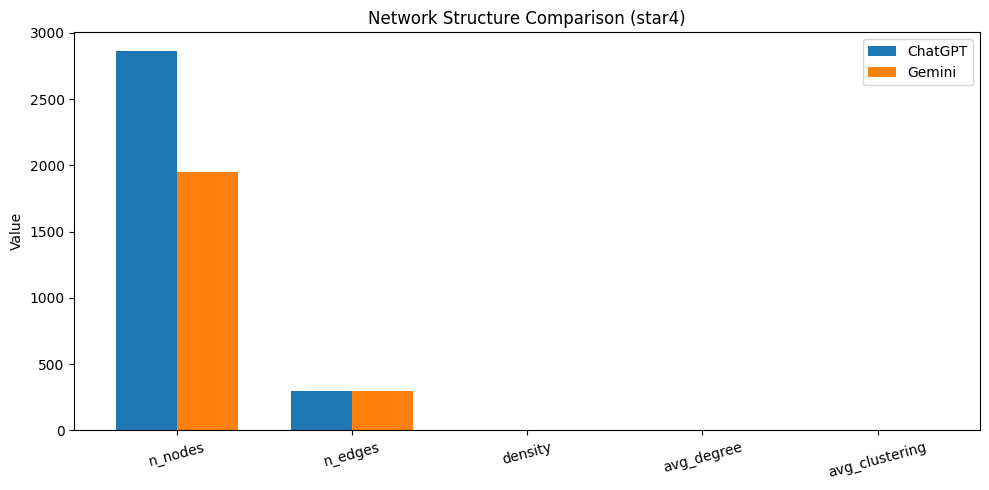

PNG 저장: /content/drive/MyDrive/AI_media_Text/최종리포트/cooc_network_compare_bars_star4.png


In [14]:
# -------------------------------
# 네트워크 구조 비교 함수
# -------------------------------
def compare_network_structures(G_gpt, G_gem, label=""):
    # 전체 네트워크 요약 지표 비교
    gpt_sum_comp = {
        "n_nodes": G_gpt.number_of_nodes(),
        "n_edges": G_gpt.number_of_edges(),
        "density": nx.density(G_gpt) if G_gpt.number_of_nodes() > 1 else 0.0,
        "avg_degree": (2*G_gpt.number_of_edges()/G_gpt.number_of_nodes()) if G_gpt.number_of_nodes() > 0 else 0.0,
        "avg_clustering": nx.average_clustering(G_gpt, weight='weight') if G_gpt.number_of_nodes() > 0 else 0.0
    }
    gem_sum_comp = {
        "n_nodes": G_gem.number_of_nodes(),
        "n_edges": G_gem.number_of_edges(),
        "density": nx.density(G_gem) if G_gem.number_of_nodes() > 1 else 0.0,
        "avg_degree": (2*G_gem.number_of_edges()/G_gem.number_of_nodes()) if G_gem.number_of_nodes() > 0 else 0.0,
        "avg_clustering": nx.average_clustering(G_gem, weight='weight') if G_gem.number_of_nodes() > 0 else 0.0
    }

    cmp_df = pd.DataFrame([gpt_sum_comp, gem_sum_comp], index=["ChatGPT", "Gemini"])
    print(f"=== 네트워크 구조 비교 ({label}) ===")
    display(cmp_df)

    # 핵심 노드 비교 (Jaccard 유사도)
    topN = 50
    top_gpt_nodes = set(gpt_nodes.head(topN)["node"])
    top_gem_nodes = set(gem_nodes.head(topN)["node"])
    common_nodes = top_gpt_nodes & top_gem_nodes
    gpt_only_nodes = top_gpt_nodes - top_gem_nodes
    gem_only_nodes = top_gem_nodes - top_gpt_nodes
    jaccard = len(common_nodes) / len(top_gpt_nodes | top_gem_nodes) if (top_gpt_nodes | top_gem_nodes) else 0.0

    print(f"\n핵심 노드 상위 {topN} 기준:")
    print(f"- 공통: {len(common_nodes)}")
    print(f"- GPT 전용 예시: {list(gpt_only_nodes)[:15]}")
    print(f"- Gemini 전용 예시: {list(gem_only_nodes)[:15]}")
    print(f"핵심노드 Jaccard 유사도: {jaccard:.3f}")

    # 커뮤니티 개수 비교 (Louvain 알고리즘 등 사용 가능)
    # 간단하게는 연결 요소 개수 비교
    n_comm_gpt = nx.number_connected_components(G_gpt) if G_gpt.number_of_nodes() > 0 else 0
    n_comm_gem = nx.number_connected_components(G_gem) if G_gem.number_of_nodes() > 0 else 0
    print(f"커뮤니티 개수 비교 - GPT:{n_comm_gpt}, Gemini:{n_comm_gem}")


# -------------------------------
# 시각화 함수 (재사용)
# -------------------------------
# 지표 바차트 (노드수/간선수/밀도/평균차수/평균클러스터링)
def plot_network_metrics_comparison(gpt_sum_dict, gem_sum_dict, tag="", outdir="/content/drive/MyDrive/AI_media_Text/최종리포트"):
    metrics = ["n_nodes", "n_edges", "density", "avg_degree", "avg_clustering"]
    vals_gpt = [gpt_sum_dict[m] for m in metrics]
    vals_gem = [gem_sum_dict[m] for m in metrics]

    x = np.arange(len(metrics))
    w = 0.35

    plt.figure(figsize=(10,5))
    plt.bar(x - w/2, vals_gpt, w, label="ChatGPT")
    plt.bar(x + w/2, vals_gem, w, label="Gemini")
    plt.xticks(x, metrics, rotation=15)
    plt.title(f"Network Structure Comparison ({tag})")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{outdir}/cooc_network_compare_bars_{tag}.png", dpi=200)
    plt.show()
    print("PNG 저장:", f"{outdir}/cooc_network_compare_bars_{tag}.png")


# -------------------------------
# 1점 리뷰 네트워크 비교
# -------------------------------
print("\n--- 1점 리뷰 네트워크 비교 ---")
# 다시 네트워크 구축 (이전 셀에서 4점 리뷰 데이터로 gpt_nodes/edges, gem_nodes/edges가 덮어쓰여짐)
text_col_gpt1 = pick_text_col(gpt_df_1)
gpt_texts_1 = gpt_df_1[text_col_gpt1].dropna().astype(str).tolist()
G_gpt1, gpt_nodes1, gpt_edges1, gpt_sum1 = build_cooc_network(
    gpt_texts_1, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

text_col_gem1 = pick_text_col(gemini_df_1)
gem_texts_1 = gemini_df_1[text_col_gem1].dropna().astype(str).tolist()
G_gem1, gem_nodes1, gem_edges1, gem_sum1 = build_cooc_network(
    gem_texts_1, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

compare_network_structures(G_gpt1, G_gem1, label="⭐1점 리뷰")
display(gpt_edges1.head(15).rename(columns={"weight": "weight_gpt"}))
display(gem_edges1.head(15).rename(columns={"weight": "weight_gem"}))
plot_network_metrics_comparison(gpt_sum1, gem_sum1, tag="star1")


# -------------------------------
# 4점 리뷰 네트워크 비교
# -------------------------------
print("\n--- 4점 리뷰 네트워크 비교 ---")
# 다시 네트워크 구축 (이전 셀에서 1점 리뷰 데이터로 gpt_nodes/edges, gem_nodes/edges가 덮어쓰여짐)
text_col_gpt4 = pick_text_col(gpt_df_4)
gpt_texts_4 = gpt_df_4[text_col_gpt4].dropna().astype(str).tolist()
G_gpt4, gpt_nodes4, gpt_edges4, gpt_sum4 = build_cooc_network(
    gpt_texts_4, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

text_col_gem4 = pick_text_col(gemini_df_4)
gem_texts_4 = gemini_df_4[text_col_gem4].dropna().astype(str).tolist()
G_gem4, gem_nodes4, gem_edges4, gem_sum4 = build_cooc_network(
    gem_texts_4, window_size=3, min_pair_count=5, min_node_freq=5, top_edges=300
)

compare_network_structures(G_gpt4, G_gem4, label="⭐4점 리뷰")
display(gpt_edges4.head(15).rename(columns={"weight": "weight_gpt"}))
display(gem_edges4.head(15).rename(columns={"weight": "weight_gem"}))
plot_network_metrics_comparison(gpt_sum4, gem_sum4, tag="star4")

## 3. TF-IDF

In [15]:
# =====================
# TF-IDF 설정
# =====================
from sklearn.feature_extraction.text import TfidfVectorizer

# 텍스트 컬럼 선택 (lemmatized > clean_text > stemmed)
def pick_text_col(df):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("텍스트 컬럼 없음")

# 공통 vocab을 쓰기 위해 GPT+Gemini 묶어서 fit
text_col = pick_text_col(gpt_df_4)

all_texts = pd.concat([
    gpt_df_4[text_col].dropna().astype(str),
    gemini_df_4[text_col].dropna().astype(str),
    gpt_df_1[text_col].dropna().astype(str),
    gemini_df_1[text_col].dropna().astype(str)
])

# TF-IDF 벡터라이저 설정
tfidf = TfidfVectorizer(
    ngram_range=(1,2),   # 단어+이그램
    max_features=20000,  # 상위 2만 단어 제한
    min_df=3             # 최소 3문서 이상 등장
)

tfidf.fit(all_texts)

print("✅ TF-IDF 벡터라이저 학습 완료")
print("Vocabulary 크기:", len(tfidf.get_feature_names_out()))


✅ TF-IDF 벡터라이저 학습 완료
Vocabulary 크기: 20000


In [16]:
import numpy as np

# 서비스별 TF-IDF 행렬 변환
X_gpt4    = tfidf.transform(gpt_df_4[text_col].dropna().astype(str))
X_gem4    = tfidf.transform(gemini_df_4[text_col].dropna().astype(str))
X_gpt1    = tfidf.transform(gpt_df_1[text_col].dropna().astype(str))
X_gem1    = tfidf.transform(gemini_df_1[text_col].dropna().astype(str))

vocab = np.array(tfidf.get_feature_names_out())

# 문서 평균 TF-IDF → 서비스 대표 키워드 뽑기
def top_tfidf_terms(X, vocab, top_n=20):
    mean_scores = np.asarray(X.mean(axis=0)).ravel()
    idx = mean_scores.argsort()[::-1][:top_n]
    return pd.DataFrame({"term": vocab[idx], "tfidf": mean_scores[idx]})

gpt4_top = top_tfidf_terms(X_gpt4, vocab, 20)
gem4_top = top_tfidf_terms(X_gem4, vocab, 20)
gpt1_top = top_tfidf_terms(X_gpt1, vocab, 20)
gem1_top = top_tfidf_terms(X_gem1, vocab, 20)

print("=== GPT 4점 Top TF-IDF ===\n", gpt4_top)
print("\n=== Gemini 4점 Top TF-IDF ===\n", gem4_top)
print("\n=== GPT 1점 Top TF-IDF ===\n", gpt1_top)
print("\n=== Gemini 1점 Top TF-IDF ===\n", gem1_top)


=== GPT 4점 Top TF-IDF ===
          term     tfidf
0         app  0.042629
1        good  0.037185
2     helpful  0.020322
3        like  0.018670
4       great  0.018015
5       image  0.017239
6      really  0.016704
7     chatgpt  0.016390
8        time  0.016329
9      useful  0.016179
10       chat  0.015989
11       help  0.015336
12       nice  0.015315
13       best  0.014767
14        use  0.014454
15  sometimes  0.014417
16         ai  0.014397
17       give  0.013128
18       love  0.012766
19     answer  0.012500

=== Gemini 4점 Top TF-IDF ===
         term     tfidf
0       good  0.176273
1       nice  0.061340
2        app  0.026179
3      great  0.022187
4       best  0.022074
5     gemini  0.017467
6    helpful  0.016811
7         ai  0.014373
8       like  0.012834
9         ok  0.012448
10  good app  0.012382
11    better  0.012090
12    useful  0.011704
13      need  0.010458
14      love  0.010285
15    google  0.009493
16       far  0.009486
17     super  0.008882
1

--- TF-IDF 워드클라우드 시각화 ---
[정보] 나눔고딕 폰트가 없어 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' 폰트를 사용합니다.


/tmp/ipython-input-1901218588.py:42: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


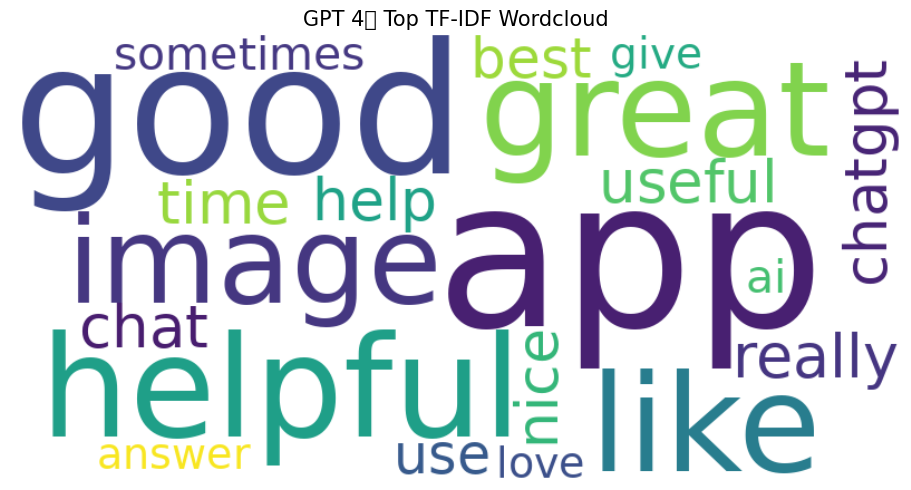

[정보] 나눔고딕 폰트가 없어 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' 폰트를 사용합니다.


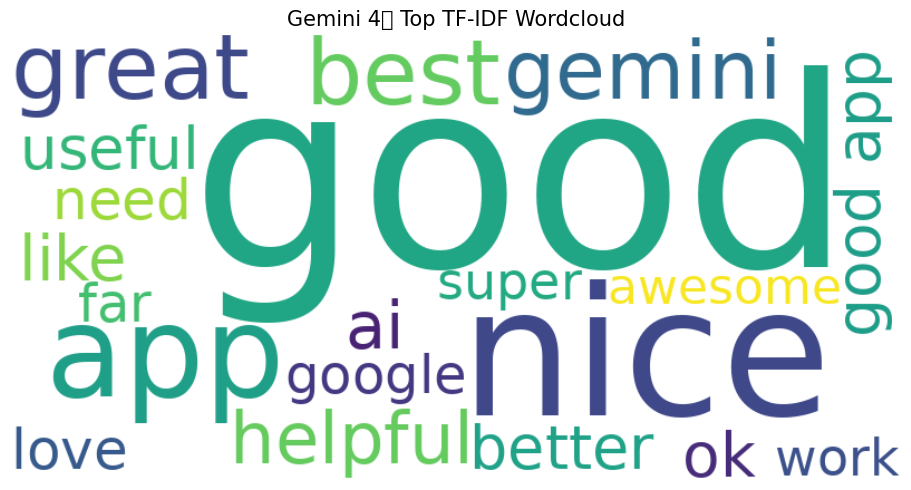

[정보] 나눔고딕 폰트가 없어 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' 폰트를 사용합니다.


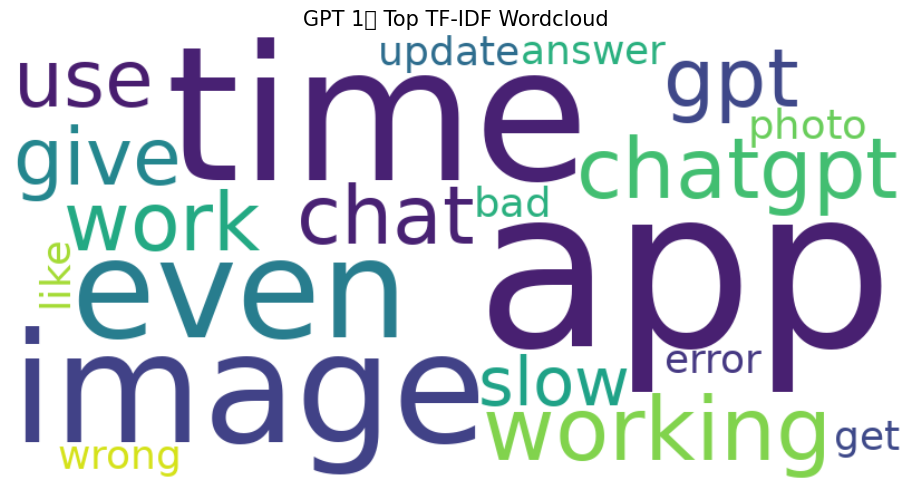

[정보] 나눔고딕 폰트가 없어 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf' 폰트를 사용합니다.


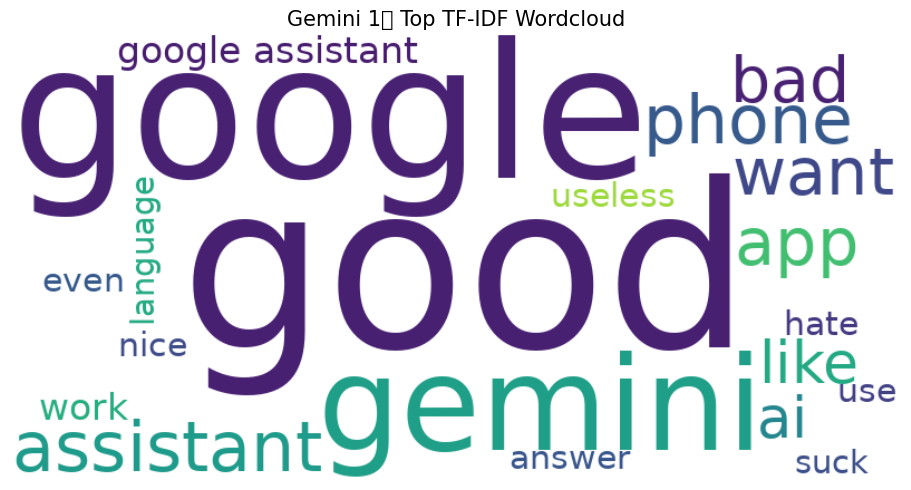

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# --------------------------
# 워드클라우드 생성 및 시각화 함수
# --------------------------
def plot_wordcloud(tfidf_df, title, colname="term", max_words=100, width=800, height=400):
    if tfidf_df.empty:
        print(f"[경고] {title}: TF-IDF 데이터 없음")
        return

    # TF-IDF 점수를 바탕으로 단어와 빈도 매핑 생성
    word_freq = dict(zip(tfidf_df[colname], tfidf_df["tfidf"]))

    # Colab 환경에 나눔고딕 폰트가 있는지 확인하고 경로 설정
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    if not os.path.exists(font_path):
        # 나눔고딕이 없으면 다른 기본 폰트 사용 (예: DejaVu Sans)
        # fm.findSystemFonts(fontpaths=None, fontext='ttf')
        # print(fm.findfont(fm.FontProperties(family='DejaVu Sans')))
        font_path = fm.findfont(fm.FontProperties(family='DejaVu Sans'))
        print(f"[정보] 나눔고딕 폰트가 없어 '{font_path}' 폰트를 사용합니다.")


    wc = WordCloud(
        font_path=font_path, # 폰트 경로
        background_color="white",
        max_words=max_words,
        width=width,
        height=height,
        random_state=42
    )

    wordcloud = wc.generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=15)
    plt.tight_layout()
    plt.show()

# --------------------------
# 워드클라우드 시각화 실행
# --------------------------
print("--- TF-IDF 워드클라우드 시각화 ---")

# 나눔 폰트 캐시 삭제 및 재빌드 (한글 깨짐 방지)
try:
    fm._load_fontmanager(try_read_cache=False)
except Exception as e:
    print(f"[경고] 폰트 캐시 로딩 중 오류 발생: {e}")


plot_wordcloud(gpt4_top, "GPT 4점 Top TF-IDF Wordcloud")
plot_wordcloud(gem4_top, "Gemini 4점 Top TF-IDF Wordcloud")
plot_wordcloud(gpt1_top, "GPT 1점 Top TF-IDF Wordcloud")
plot_wordcloud(gem1_top, "Gemini 1점 Top TF-IDF Wordcloud")

## 4. LDA 분석

### LDA 설정

In [18]:
# 라이브러리 인스톨
!pip install gensim
!pip -q install pyLDAvis

In [19]:
# =====================
# LDA 설정
# =====================
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora

# 텍스트 컬럼
text_col = pick_text_col(gpt_df_4)

# 리뷰 텍스트 모으기
gpt4_texts    = gpt_df_4[text_col].dropna().astype(str).tolist()
gem4_texts    = gemini_df_4[text_col].dropna().astype(str).tolist()
gpt1_texts    = gpt_df_1[text_col].dropna().astype(str).tolist()
gem1_texts    = gemini_df_1[text_col].dropna().astype(str).tolist()

# 간단 토큰화
def tokenize(texts):
    return [t.split() for t in texts]

gpt4_tokens = tokenize(gpt4_texts)
gem4_tokens = tokenize(gem4_texts)
gpt1_tokens = tokenize(gpt1_texts)
gem1_tokens = tokenize(gem1_texts)


### LDA 분석

In [20]:
# =====================
# LDA 분석
# =====================
from gensim.models.ldamodel import LdaModel

def run_lda(tokens, num_topics=5, passes=10):
    # Dictionary & Corpus
    dictionary = corpora.Dictionary(tokens)
    dictionary.filter_extremes(no_below=5, no_above=0.5)  # 최소 5회 이상, 상위 50% 미만 문서 등장
    corpus = [dictionary.doc2bow(text) for text in tokens]

    # LDA 모델 학습
    lda = LdaModel(corpus=corpus,
                   id2word=dictionary,
                   num_topics=num_topics,
                   passes=passes,
                   random_state=42)
    return lda, corpus, dictionary

# 실행 (예: 별점 4 GPT 리뷰)
lda_gpt4, corpus_gpt4, dict_gpt4 = run_lda(gpt4_tokens, num_topics=5)
lda_gem4, corpus_gem4, dict_gem4 = run_lda(gem4_tokens, num_topics=5)
lda_gpt1, corpus_gpt1, dict_gpt1 = run_lda(gpt1_tokens, num_topics=5)
lda_gem1, corpus_gem1, dict_gem1 = run_lda(gem1_tokens, num_topics=5)

# 토픽별 주요 키워드 출력
print("=== GPT ★1 ===")
for idx, topic in lda_gpt1.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

print("\n=== Gemini ★1 ===")
for idx, topic in lda_gem1.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

# 토픽별 주요 키워드 출력
print("=== GPT ★4 ===")
for idx, topic in lda_gpt4.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

print("\n=== Gemini ★4 ===")
for idx, topic in lda_gem4.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx}: {[w for w, _ in topic]}")

=== GPT ★1 ===
Topic 0: ['chat', 'gpt', 'update', 'like', 'voice', 'new', 'chatgpt', 'back', 'conversation', 'text']
Topic 1: ['free', 'limit', 'plus', 'subscription', 'use', 'version', 'money', 'pay', 'paid', 'get']
Topic 2: ['app', 'working', 'work', 'error', 'phone', 'please', 'issue', 'problem', 'use', 'login']
Topic 3: ['image', 'time', 'app', 'photo', 'slow', 'bad', 'picture', 'working', 'take', 'create']
Topic 4: ['give', 'answer', 'app', 'question', 'ai', 'wrong', 'time', 'information', 'ask', 'good']

=== Gemini ★1 ===
Topic 0: ['bad', 'ai', 'nice', 'app', 'worst', 'useless', 'better', 'poor', 'chatgpt', 'chat']
Topic 1: ['answer', 'time', 'question', 'give', 'gemini', 'wrong', 'asked', 'ask', 'information', 'say']
Topic 2: ['google', 'assistant', 'work', 'gemini', 'like', 'ok', 'use', 'even', 'voice', 'app']
Topic 3: ['want', 'phone', 'suck', 'app', 'hate', 'language', 'gemini', 'change', 'get', 'uninstall']
Topic 4: ['good', 'working', 'hai', 'image', 'slow', 'generate', 'pr

### 시각화

,GPT ★4,Gemini ★4
"Topic 1 - app, good, answer",0.330949,0.260696
"Topic 2 - chatgpt, user, ai",0.130813,0.231788
"Topic 3 - chat, gpt, app",0.173913,0.162621
"Topic 4 - app, good, like",0.182461,0.162060
"Topic 5 - good, image, app",0.181864,0.182835


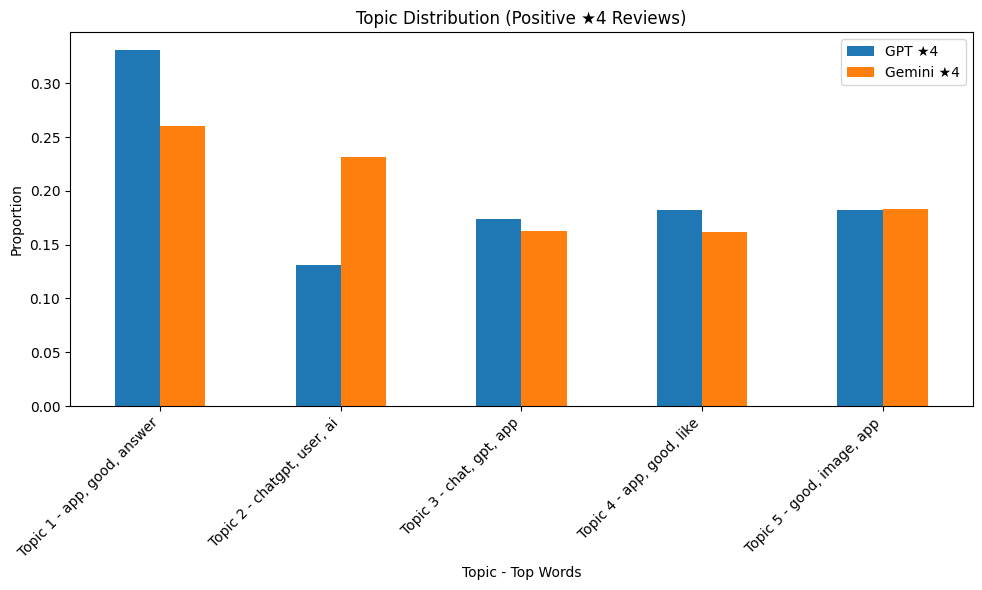

,GPT ★1,Gemini ★1
"Topic 1 - chat, gpt, update",0.209959,0.180845
"Topic 2 - free, limit, plus",0.141468,0.222039
"Topic 3 - app, working, work",0.210048,0.242373
"Topic 4 - image, time, app",0.227523,0.227058
"Topic 5 - give, answer, app",0.211001,0.127684


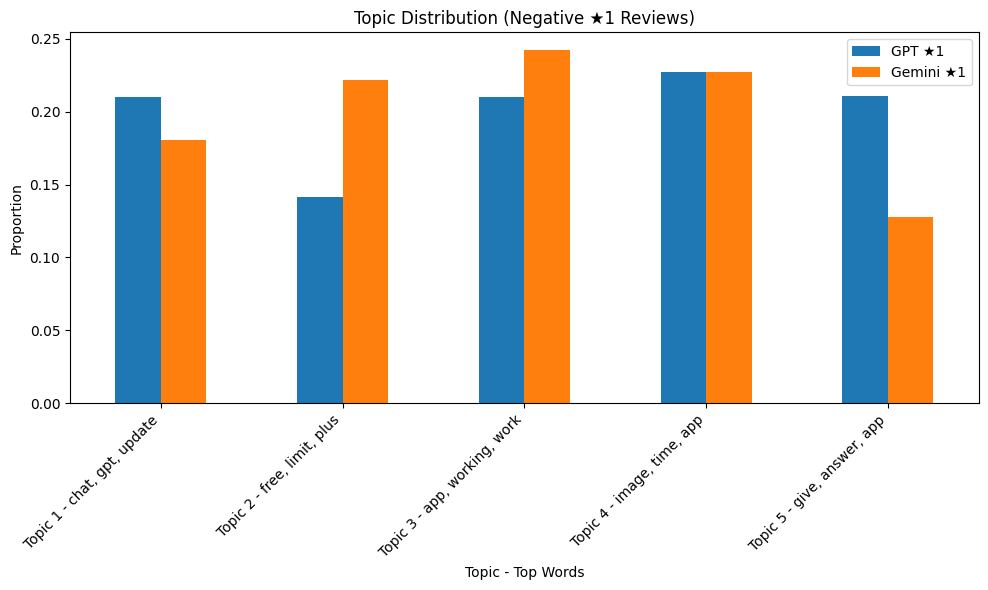

In [21]:
# =====================
# LDA 주제 분포 비교 막대그래프 (개선본)
# =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # (선택) 스타일만 필요하면 생략 가능
from pathlib import Path

outdir = "/content/drive/MyDrive/AI_media_Text/최종리포트"
Path(outdir).mkdir(parents=True, exist_ok=True)

# 문서별 토픽 분포 (비율) 계산
def get_topic_distribution(lda, corpus, n_topics=5):
    dist = np.zeros(n_topics, dtype=float)
    total = 0.0
    for bow in corpus:
        d = lda.get_document_topics(bow, minimum_probability=0.0)
        # d는 (topic_id, prob) 리스트. 합=1.0 보장. 문서 1개 처리 시 total += 1
        for tid, prob in d:
            dist[tid] += prob
        total += 1.0
    if total == 0:             # 문서가 없는 경우 방어
        return np.zeros(n_topics, dtype=float)
    return dist / dist.sum()   # 전체 합으로 정규화(비율)

# 토픽 레이블(대표 단어)
def get_topic_labels(lda, topn=3):
    labels = {}
    for tid, terms in lda.show_topics(num_topics=lda.num_topics, num_words=topn, formatted=False):
        top_words = ", ".join([w for w, _ in terms])
        labels[tid] = f"Topic {tid+1} - {top_words}"
    return labels

# ----------------------------
# 긍정 리뷰 (★4) 주제 분포: GPT vs Gemini (각자 학습한 토픽이므로 '별도' 비교)
# ----------------------------
labels_gpt4 = get_topic_labels(lda_gpt4, topn=3)
labels_gem4 = get_topic_labels(lda_gem4, topn=3)

gpt4_dist = get_topic_distribution(lda_gpt4, corpus_gpt4, n_topics=5)
gem4_dist = get_topic_distribution(lda_gem4, corpus_gem4, n_topics=5)

df_dist4 = pd.DataFrame({
    "GPT ★4": gpt4_dist,
    "Gemini ★4": gem4_dist
}, index=[labels_gpt4[i] for i in range(5)])  # x축은 GPT★4의 토픽 라벨로 고정

display(df_dist4)

ax = df_dist4.plot(kind="bar", figsize=(10,6))
ax.set_title("Topic Distribution (Positive ★4 Reviews)")
ax.set_ylabel("Proportion")
ax.set_xlabel("Topic - Top Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{outdir}/lda_topic_dist_star4.png", dpi=200)
plt.show()

# ----------------------------
# 부정 리뷰 (★1) 주제 분포: GPT vs Gemini (각자 학습한 토픽이므로 '별도' 비교)
# ----------------------------
labels_gpt1 = get_topic_labels(lda_gpt1, topn=3)
labels_gem1 = get_topic_labels(lda_gem1, topn=3)

gpt1_dist = get_topic_distribution(lda_gpt1, corpus_gpt1, n_topics=5)
gem1_dist = get_topic_distribution(lda_gem1, corpus_gem1, n_topics=5)

df_dist1 = pd.DataFrame({
    "GPT ★1": gpt1_dist,
    "Gemini ★1": gem1_dist
}, index=[labels_gpt1[i] for i in range(5)])  # x축은 GPT★1의 토픽 라벨로 고정

display(df_dist1)

ax = df_dist1.plot(kind="bar", figsize=(10,6))
ax.set_title("Topic Distribution (Negative ★1 Reviews)")
ax.set_ylabel("Proportion")
ax.set_xlabel("Topic - Top Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{outdir}/lda_topic_dist_star1.png", dpi=200)
plt.show()


In [22]:
# =====================
# LDAvis
# =====================
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

def visualize_lda(lda_model, corpus, dictionary, html_path):
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, html_path)
    print("💾 LDAvis 저장:", html_path)

outdir = "/content/drive/MyDrive/AI_media_Text/최종리포트"

# 예: GPT 4점 리뷰 시각화
visualize_lda(lda_gpt4, corpus_gpt4, dict_gpt4, f"{outdir}/lda_gpt_star4.html")
visualize_lda(lda_gem4, corpus_gem4, dict_gem4, f"{outdir}/lda_gem_star4.html")

# 1점 리뷰도 동일하게 저장 가능
visualize_lda(lda_gpt1, corpus_gpt1, dict_gpt1, f"{outdir}/lda_gpt_star1.html")
visualize_lda(lda_gem1, corpus_gem1, dict_gem1, f"{outdir}/lda_gem_star1.html")


💾 LDAvis 저장: /content/drive/MyDrive/AI_media_Text/최종리포트/lda_gpt_star4.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

💾 LDAvis 저장: /content/drive/MyDrive/AI_media_Text/최종리포트/lda_gem_star4.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

💾 LDAvis 저장: /content/drive/MyDrive/AI_media_Text/최종리포트/lda_gpt_star1.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

💾 LDAvis 저장: /content/drive/MyDrive/AI_media_Text/최종리포트/lda_gem_star1.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# 감정 분석

In [23]:
# =====================
# 감성 분석 설정 (VADER)
# =====================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# 텍스트 컬럼 선택
def pick_text_col(df: pd.DataFrame):
    for c in ["lemmatized", "clean_text", "stemmed"]:
        if c in df.columns:
            return c
    raise KeyError("텍스트 컬럼(lemmatized/clean_text/stemmed)이 없습니다.")

# NLTK VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

try:
    _ = nltk.data.find("sentiment/vader_lexicon.zip")
except LookupError:
    nltk.download("vader_lexicon")

SIA = SentimentIntensityAnalyzer()

# 안전 토큰/클린 (영문 외 잔여 특문 방어)
def clean_text(s: str) -> str:
    if pd.isna(s): return ""
    s = str(s)
    s = re.sub(r"\s+", " ", s).strip()
    return s


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 긍정, 중립, 부정 분포표

In [24]:
# =====================
# 감성 라벨링 & 분포표
# =====================
def label_sentiment(text: str) -> str:
    text = clean_text(text)
    if not text:
        return "neutral"
    c = SIA.polarity_scores(text)["compound"]
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"

def sentiment_distribution(df: pd.DataFrame, name: str):
    col = pick_text_col(df)
    tmp = df[[col]].copy()
    tmp["sentiment"] = tmp[col].astype(str).map(label_sentiment)
    dist = tmp["sentiment"].value_counts(dropna=False).reindex(["positive","neutral","negative"]).fillna(0).astype(int)
    prop = (dist / max(1, dist.sum())).round(4)
    out = pd.DataFrame({"count": dist, "ratio": prop})
    out.index.name = f"{name}"
    return out

# ★4(긍정 리뷰 집합) / ★1(부정 리뷰 집합) 각각 ChatGPT vs Gemini 비교
dist_gpt4 = sentiment_distribution(gpt_df_4, "ChatGPT ★4")
dist_gem4 = sentiment_distribution(gemini_df_4, "Gemini  ★4")
dist_gpt1 = sentiment_distribution(gpt_df_1, "ChatGPT ★1")
dist_gem1 = sentiment_distribution(gemini_df_1, "Gemini  ★1")

print("✅ 분포표 (★4)")
display(pd.concat([dist_gpt4, dist_gem4], axis=1))

print("\n✅ 분포표 (★1)")
display(pd.concat([dist_gpt1, dist_gem1], axis=1))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ 분포표 (★4)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,count,ratio,count,ratio
positive,13175,0.8632,17227,0.8173
neutral,994,0.0651,3072,0.1457
negative,1094,0.0717,779,0.0370



✅ 분포표 (★1)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,count,ratio,count,ratio
positive,5656,0.3954,13176,0.3334
neutral,2336,0.1633,12564,0.3179
negative,6311,0.4412,13780,0.3487


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

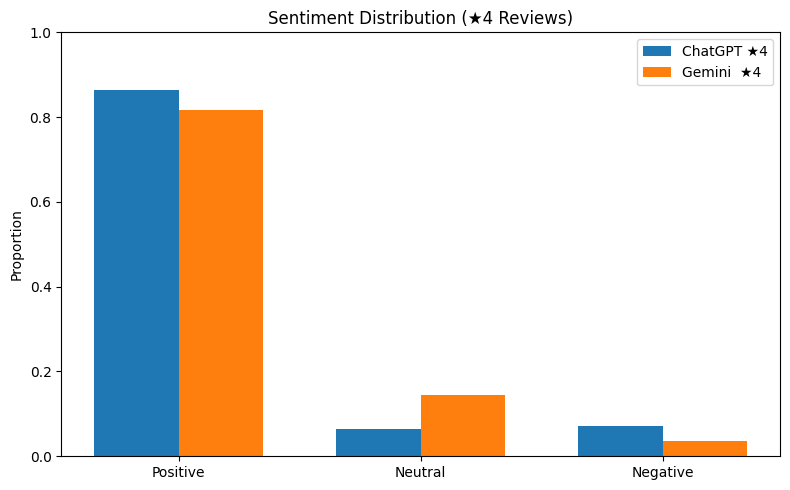

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

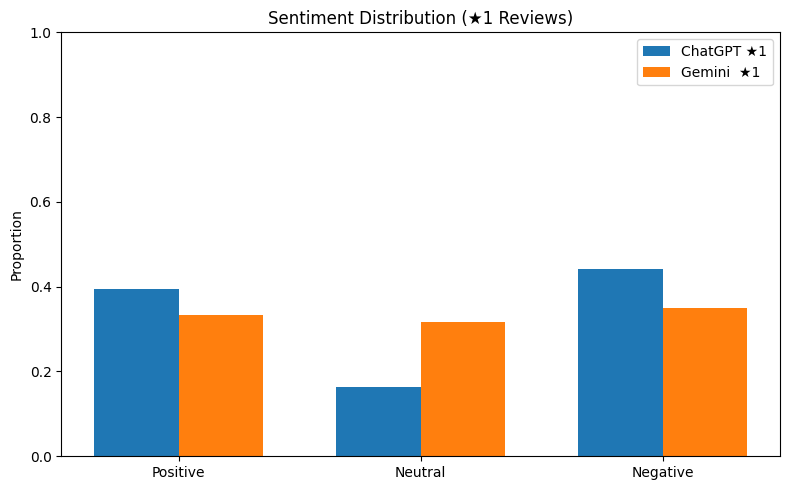

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [25]:
# =====================
# 감성 분포 시각화
# =====================
import matplotlib.pyplot as plt

def plot_sentiment_bars(dist_left: pd.DataFrame, dist_right: pd.DataFrame, title: str, save_path=None):
    # dist_* 는 index가 'positive, neutral, negative' 순서의 행 DF여야 함
    labels = ["positive","neutral","negative"]
    left_vals  = dist_left.loc[labels, "ratio"].values
    right_vals = dist_right.loc[labels, "ratio"].values

    x = np.arange(len(labels))
    w = 0.35

    plt.figure(figsize=(8,5))
    plt.bar(x - w/2, left_vals,  width=w, label=dist_left.index.name)
    plt.bar(x + w/2, right_vals, width=w, label=dist_right.index.name)
    plt.xticks(x, ["Positive","Neutral","Negative"])
    plt.ylim(0, 1)
    plt.ylabel("Proportion")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=200)
    plt.show()

# 실행: 별점 4/1 각각 비교
plot_sentiment_bars(dist_gpt4, dist_gem4, "Sentiment Distribution (★4 Reviews)",
                    save_path="/content/drive/MyDrive/AI_media_Text/최종리포트/sentiment_star4.png")
plot_sentiment_bars(dist_gpt1, dist_gem1, "Sentiment Distribution (★1 Reviews)",
                    save_path="/content/drive/MyDrive/AI_media_Text/최종리포트/sentiment_star1.png")


### 감성별 단어 빈도 분석